<a href="https://colab.research.google.com/github/ChewPeng/R/blob/main/R_ConfeRence_2022_Workshop_Intro_to_Machine_Learning_20221126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning**


Prepared by:
    
Dr. Gan Chew Peng
<br><br>

LinkedIn: [ChewPeng](https://www.linkedin.com/in/chew-peng-gan-03b516a6/)


## Dataset

In this session, we are going to use [insurance.csv](https://github.com/ChewPeng/R/blob/main/insurance.csv) dataset. Take note that this dataset was downloaded from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).

------

1: Read the `insurance.csv`

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/ChewPeng/R/main/insurance.csv",
                  header=T, 
                  sep=",",
                  strip.white=T,
                  stringsAsFactors = T)


head(df)

dim(df)



,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


[1] 1338    7

2: Summary of the data

In [ ]:
summary(df)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

3: Data Visualisation


For categorical variable, may consider bar plot or pie chart. 

3.1: Univariate Bar Plot

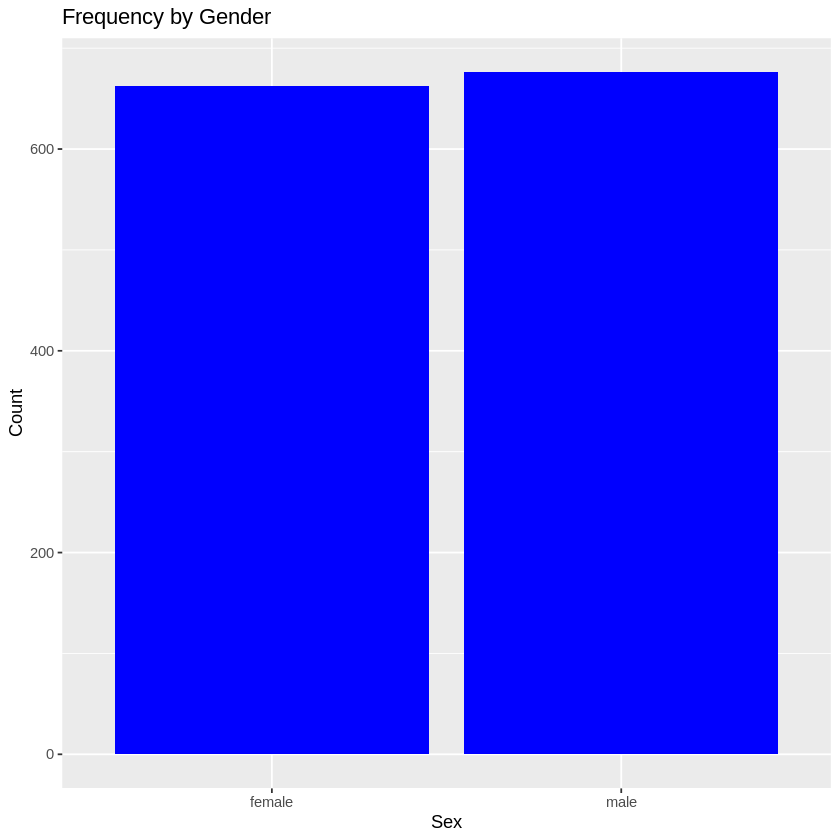

In [ ]:
library(ggplot2)

ggplot(df) + 
  geom_bar(aes(sex), fill = "blue") + 
  xlab("Sex") + ylab("Count") + 
  ggtitle("Frequency by Gender")

------

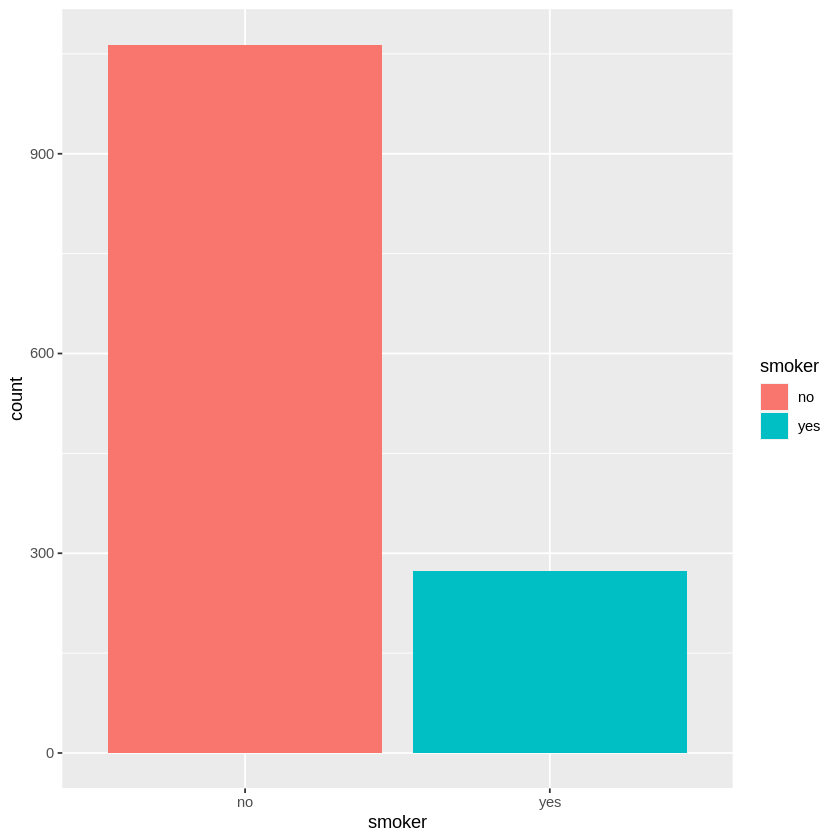

In [ ]:
ggplot(df, aes(smoker)) + 
  geom_bar(aes(fill=smoker))

Exercise: Try to obtain a barchart for the 'region' variable.

3.2: Grouped Bar Chart

A grouped bar chart plots values for two levels of a categorical variable instead of one.

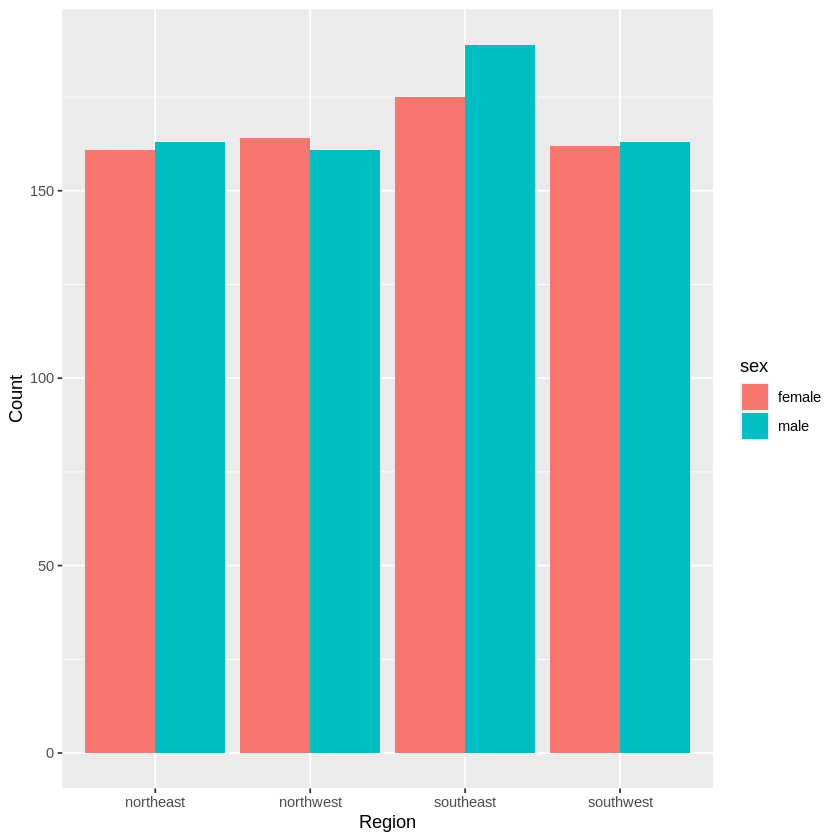

In [ ]:
ggplot(df) +
  geom_bar(aes(x = region, fill = sex), position = "dodge") +
  xlab("Region") + ylab("Count")

3.3: Stacked Bar Plot

The bars are stacked on top of each other instead of placing them next to each other. Use stacked bar plots while looking at cumulative value.

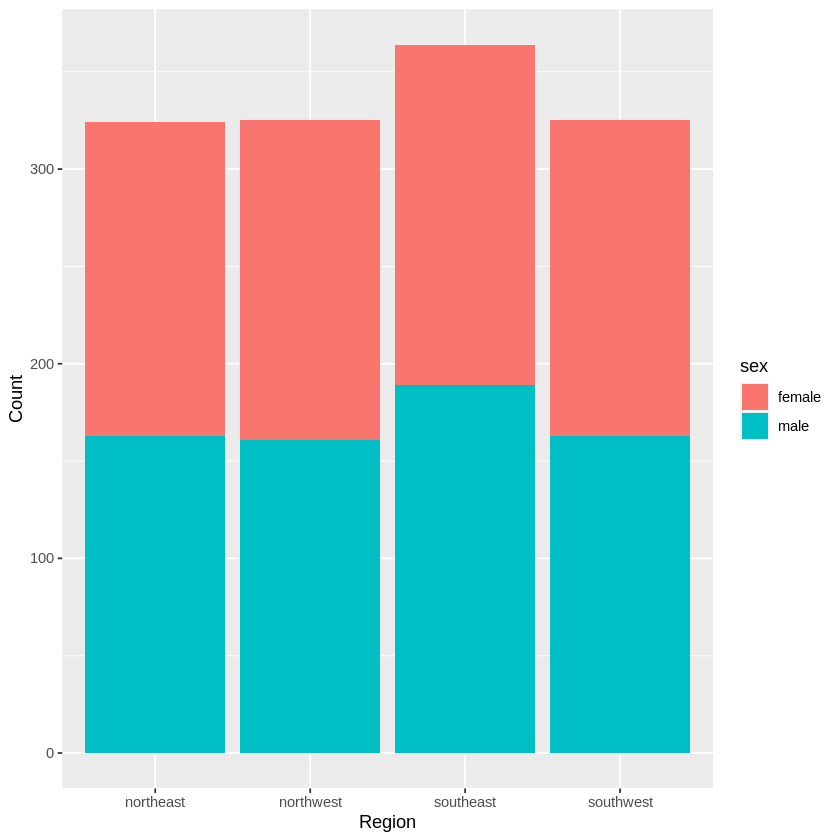

In [ ]:
ggplot(df) +
  geom_bar(aes(x = region, fill = sex)) +
  xlab("Region") + ylab("Count")

For continuous variable, may consider histogram or box-plot. 


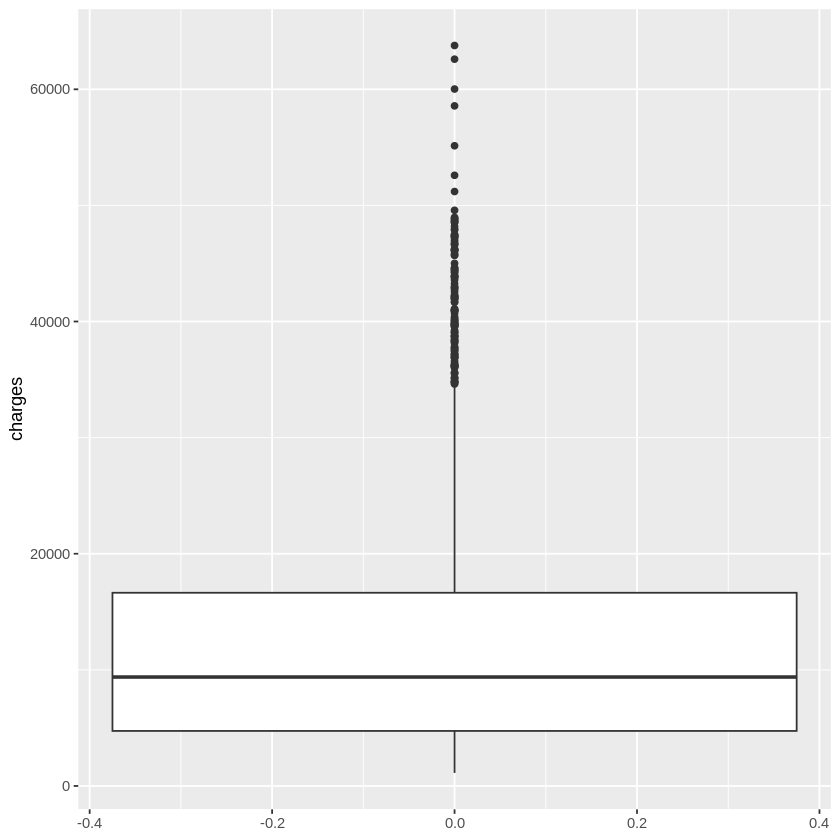

In [ ]:
ggplot(df) +
  geom_boxplot(aes(y=charges)) 


Use scatter plot for both continuous variables. 

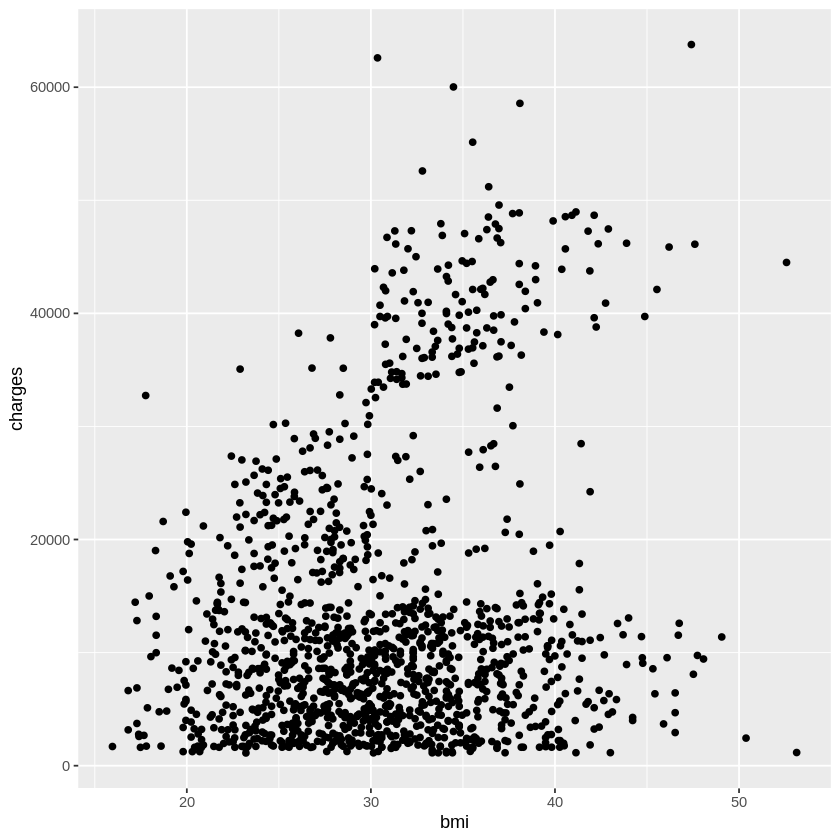

In [ ]:
ggplot(df) + 
  geom_point(aes(x = bmi, y = charges))

## Machine Learning Techniques

Data Splitting (Train-Test Split)

*   Train Dataset: Used to fit the machine learning model.
*   Test Dataset: Used to evaluate the fit machine learning model.


In [ ]:
library(dplyr)

set.seed(101) # Set Seed so that same sample can be reproduced in future also

sample <- sample.int(n = nrow(df), size = floor(.75*nrow(df)), replace = F)
Train <- df[sample, ]
Test  <- df[-sample, ]

XTest <- Test %>% select (age:region)
yTest  <- Test %>% select (charges)

dim(Train)
dim(XTest)
dim(yTest)

[1] 1003    7

[1] 335   6

[1] 335   1

## Linear Regression : Factors affecting `charges`

The mathematical formula of the linear regression can be written as `y = b0 + b1*x + e`, where:

`b0` and `b1` are known as the regression coefficients or parameters:
*   `b0` is the intercept of the regression line; that is the predicted value when `x = 0`.
*   `b1` is the slope of the regression line.
*   `e` is the error term (also known as the residuals), the part of `y` that cannot be explained by the regression model



Now , let us investigate the relationship between `charges` and `age` . 

In [ ]:
cor(Train[, unlist(lapply(Train, is.numeric))])


,age,bmi,children,charges
age,1.00000000,0.109137330,0.028805474,0.28691474
bmi,0.10913733,1.000000000,-0.007511558,0.17108515
children,0.02880547,-0.007511558,1.000000000,0.05376798
charges,0.28691474,0.171085150,0.053767977,1.00000000


**1: Simple Linear Regression**

The simple linear regression tries to find the best fit line to represent the relationship between *y* and *x*. 

The linear model equation can be written as follow: 

```
charges = b0 + b1 * age
```

The R function `lm()` can be used to determine the beta coefficients of the linear model:

In [ ]:
model1 <- lm(charges ~  age, data = Train)
model1


Call:
lm(formula = charges ~ age, data = Train)

Coefficients:
(Intercept)          age  
     3406.2        246.1  


**2: Scatter Plot**

`geom_smooth()` using formula = 'y ~ x'


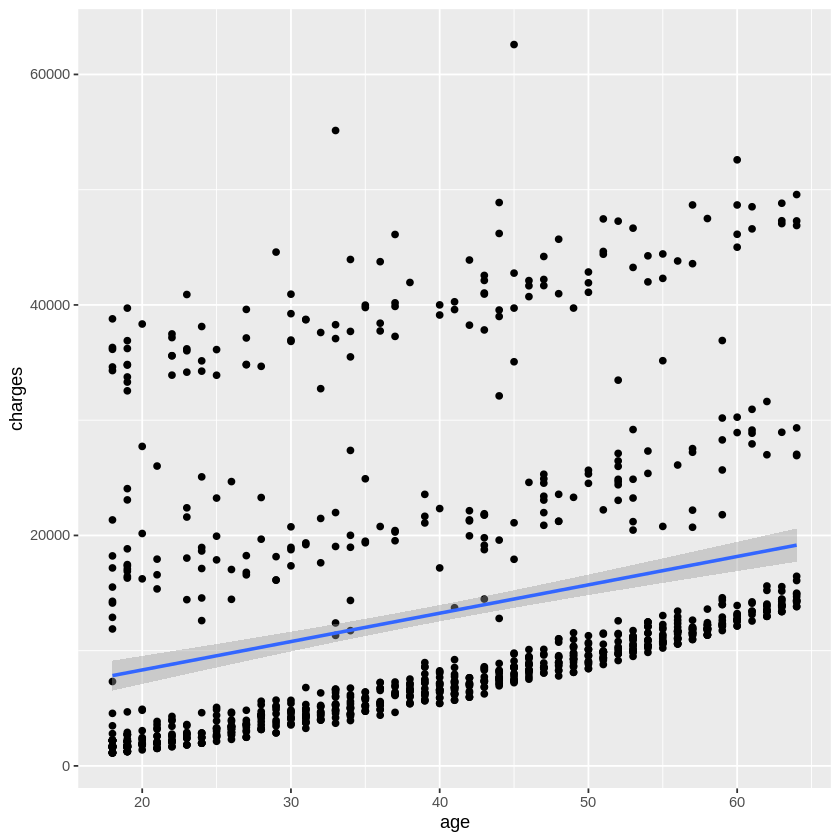

In [ ]:
ggplot(Train, aes(x=age, y=charges)) +
  geom_point() +
  stat_smooth(method = lm)

**3: Statistical Summary of the Simple Linear Regression Model**




In [ ]:
summary(model1)


Call:
lm(formula = charges ~ age, data = Train)

Residuals:
   Min     1Q Median     3Q    Max 
 -7867  -6494  -5744   3970  48110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3406.21    1084.44   3.141  0.00173 ** 
age           246.14      25.98   9.476  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11460 on 1001 degrees of freedom
Multiple R-squared:  0.08232,	Adjusted R-squared:  0.0814 
F-statistic: 89.79 on 1 and 1001 DF,  p-value: < 2.2e-16


**4: Multiple Linear Regression Model**

In [ ]:
model2 <- lm(charges ~  ., 
            data = Train)
model2

summary(model2)


Call:
lm(formula = charges ~ ., data = Train)

Coefficients:
    (Intercept)              age          sexmale              bmi  
        -9418.5            242.7           -119.4            273.1  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.1          24459.2           -631.2          -1007.3  
regionsouthwest  
        -1158.3  



Call:
lm(formula = charges ~ ., data = Train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12541.9  -2385.5   -936.9   1077.0  29465.1 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9418.48    1110.85  -8.479  < 2e-16 ***
age               242.74      13.29  18.268  < 2e-16 ***
sexmale          -119.35     369.95  -0.323  0.74705    
bmi               273.07      31.75   8.601  < 2e-16 ***
children          475.09     149.03   3.188  0.00148 ** 
smokeryes       24459.22     466.05  52.482  < 2e-16 ***
regionnorthwest  -631.20     535.72  -1.178  0.23899    
regionsoutheast -1007.31     529.10  -1.904  0.05722 .  
regionsouthwest -1158.25     533.34  -2.172  0.03012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5816 on 994 degrees of freedom
Multiple R-squared:  0.7653,	Adjusted R-squared:  0.7634 
F-statistic:   405 on 8 and 994 DF,  p-value: < 2.2e-16


Remove variable 'sex' from the analysis. 

In [ ]:
model3 <- lm(charges ~  .-sex, 
            data = Train)
model3

summary(model3)


Call:
lm(formula = charges ~ . - sex, data = Train)

Coefficients:
    (Intercept)              age              bmi         children  
        -9464.4            242.8            272.8            473.6  
      smokeryes  regionnorthwest  regionsoutheast  regionsouthwest  
        24444.7           -629.2          -1010.1          -1164.0  



Call:
lm(formula = charges ~ . - sex, data = Train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12474.0  -2380.3   -943.9   1056.4  29417.1 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9464.37    1101.21  -8.595  < 2e-16 ***
age               242.76      13.28  18.278  < 2e-16 ***
bmi               272.78      31.72   8.599  < 2e-16 ***
children          473.63     148.89   3.181  0.00151 ** 
smokeryes       24444.68     463.66  52.722  < 2e-16 ***
regionnorthwest  -629.17     535.44  -1.175  0.24026    
regionsoutheast -1010.14     528.79  -1.910  0.05638 .  
regionsouthwest -1164.03     532.80  -2.185  0.02914 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5813 on 995 degrees of freedom
Multiple R-squared:  0.7652,	Adjusted R-squared:  0.7636 
F-statistic: 463.3 on 7 and 995 DF,  p-value: < 2.2e-16


**5: Plot**

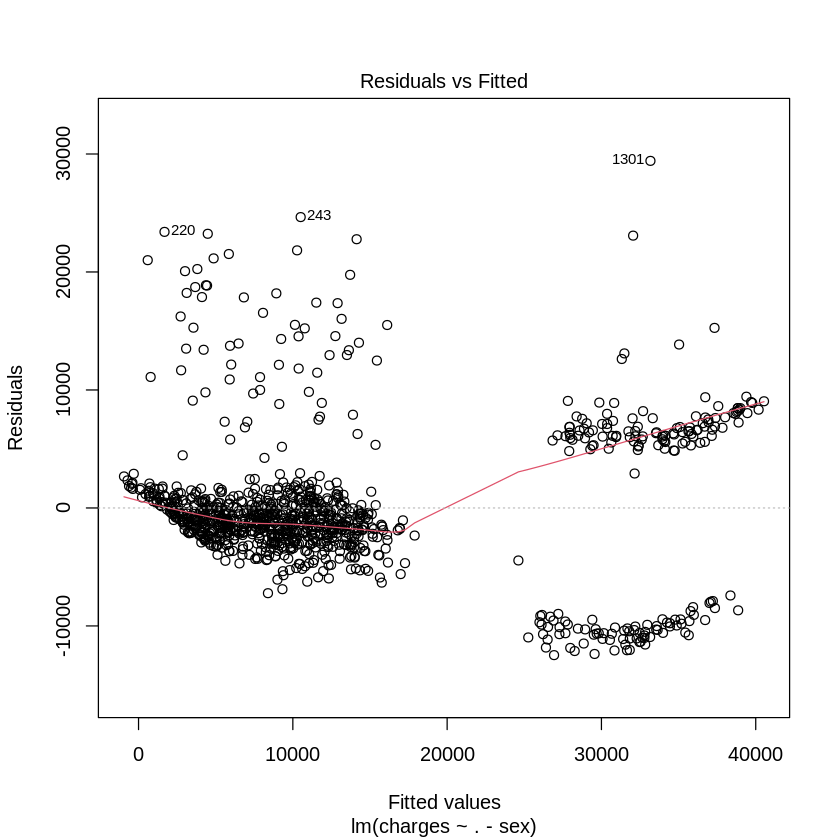

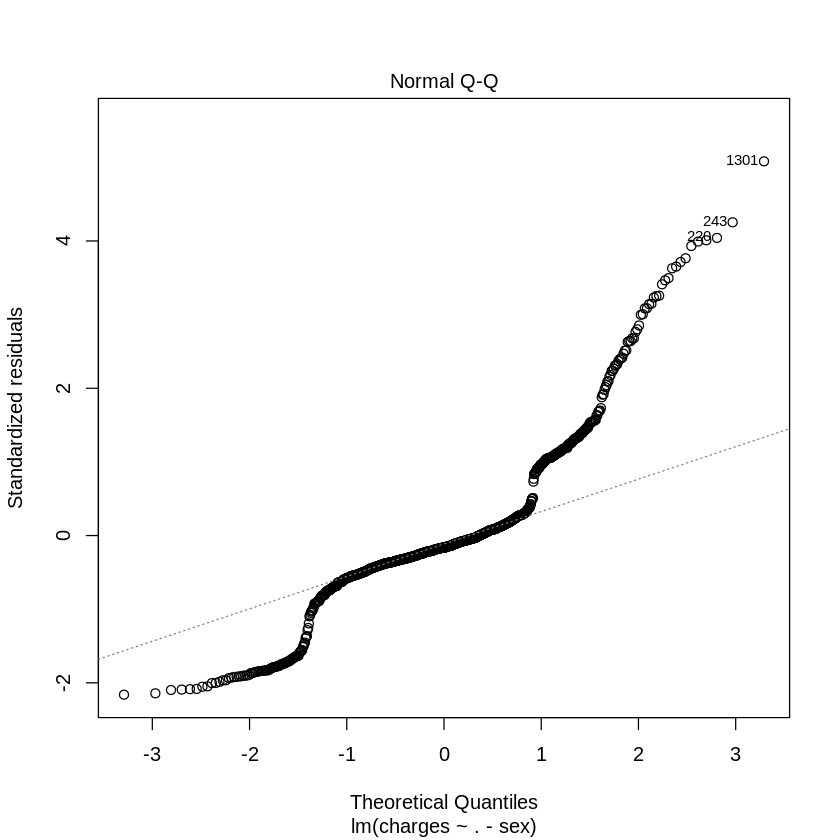

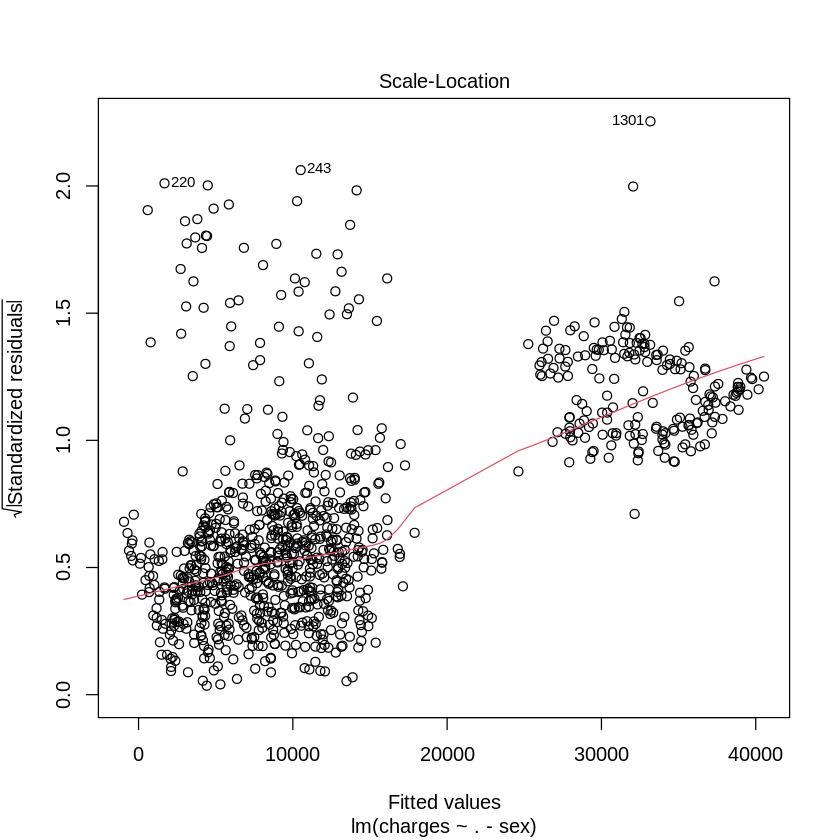

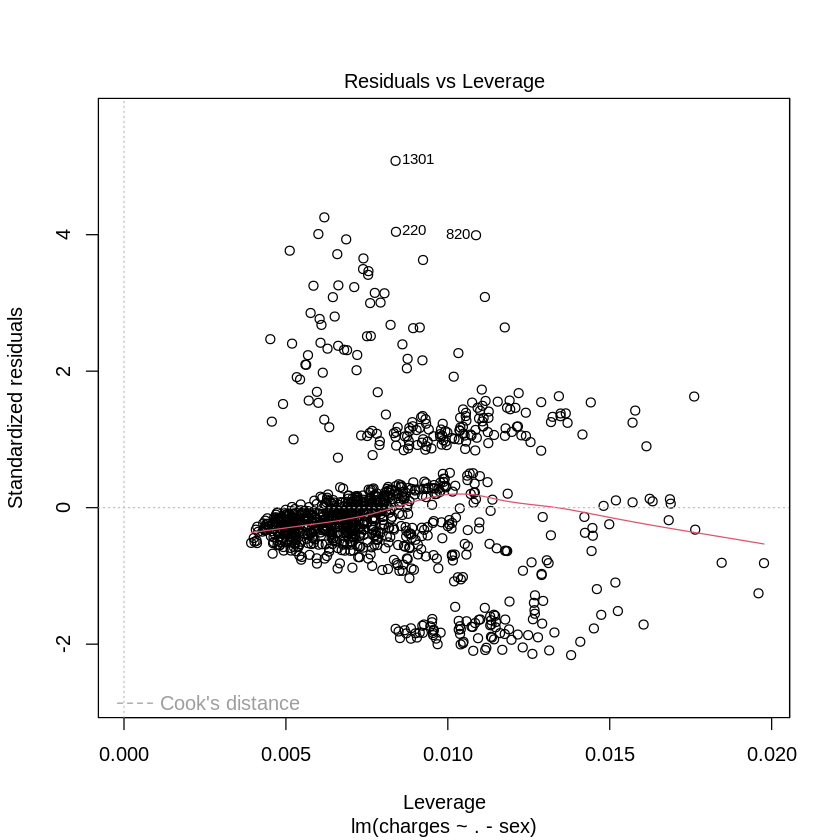

In [ ]:
plot(model3)

**6: Test the Model Performance**

In [ ]:
y_hat <- predict(model3, newdata = XTest)

square_error <- (yTest - y_hat)^2

RMSE <- sqrt(mean(square_error$charges))
RMSE

[1] 6824.549

------